<a href="https://colab.research.google.com/github/ankit7700/IPL-Win-Prediction-project/blob/main/IPL_ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name - Ankit Choudhary

# IPL Analysis and M.L Modeling

## Problem Statement

🔍 **Problem Statement**:

Welcome to the Machine Learning project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in Python, E.D.A, Statics & M.L to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided ipl dataset (2008-2019) containing information about various matches to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help you analyze various key points, aspects, and information about the IPL. 🎉

## 1.  About the Dataset

    This data was gathered during (2008-2019) IPL Matches.
Data description is as follows;

Match Dataset:
1. id - Unique match ID
2. Season - match belong to which season
3. city - match host city
4. date - date of the match
5. team1, team2 - teams competing against each other
6. toss_winner - which team won the toss
7. toss_decision - decision of the team to bat or ball first
8. result - type of match result
9. dl_applied - is dl applied in the match
10. winner - which team won the match
11. win_by_runs - match win by runs
12. win_by_wickets - match win by wickets
13. player_of_match - best player of the match
14. venue - host stadium information
15. umpire1,2,3 - umpire information

Delivery Dataset:

1. match_id - match id of the match
2. total_runs_x - 1 team runs
3. inning - 1 or 2 inning information
4. batting_team - batting team information
5. bowling_team - bowling team information
6. over - over information
7. ball - ball of the over information
8. batsman - batsman info.
9. non_striker - non_striker batsman info.
10. bowler - bowler info.
11. is_super_over - super over info.
12. wide, bye, legbye, noball, penalty, batsman, extra, total runs - runs information of batting team
13. player_dismissed - player out info.
14. dismissal_kind - mathod of player dismissed
15. fielder - fielder information

## Task 1 - Basic CleanUp

- **Clean and pre process the dataset (handling missing values, data types, etc.).**


**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [147]:
# required important python libraries

import pandas as pd                                         # Data Wrangling library
import numpy as np
import matplotlib.pyplot as plt                             # EDA library
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer               # ML preprocess library
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler            # Scaling library

from sklearn.linear_model import LogisticRegression         # ML library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score                  # accuracy score library

import pickle

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:

path1 = "/content/drive/MyDrive/Colab Notebooks/data science/module 6/assignment/deliveries.csv"
path2 = "/content/drive/MyDrive/Colab Notebooks/data science/module 6/assignment/matches.csv"


delivery = pd.read_csv(path1)
match = pd.read_csv(path2)

In [150]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [151]:
# check no of rows and column

print(f"No of Row's = {match.shape[0]}\nNo of Columns = {match.shape[1]}")

No of Row's = 756
No of Columns = 18


In [152]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [153]:
# check no of rows and column

print(f"No of Row's = {delivery.shape[0]}\nNo of Columns = {delivery.shape[1]}")

No of Row's = 179078
No of Columns = 21


In [154]:
# check null values

match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [155]:
match.drop(columns=['umpire3'], inplace=True)

In [156]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [157]:
# checking duplicated values in df

match.duplicated().sum()

0

In [158]:
delivery.duplicated().sum()

23

In [159]:
# duplicate values

pd.DataFrame(delivery[delivery.duplicated()]).head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [160]:
# checking if values actually duplicate or not

delivery[(delivery['match_id']==221) & (delivery['inning']==1) & (delivery['over']==4) & (delivery['ball']==1)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52169,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [161]:
# removing duplicate values from data


# match.drop_duplicates(inplace=True)
delivery.drop_duplicates(inplace=True)

In [162]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(4), object(13)
memory usag

In [163]:
# checking data information

delivery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int64 
 

In [164]:
# describing data

match.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [165]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### What did you know about your dataset?

**Answer Here**

This dataset  contain information about various IPL Matches played during (2008-2019), including details like the teams, inning, overs, runs, players, and city.

1. match data consists of 18 columns and 756 rows. & delivery data consists of 21 columns and 179055 rows
2. In match dataset maximum columns are objective type. & In delivery dataset maximum columns are numeric type.
3. There are some duplicated records in the delivery dataset which i removed.
4. There are some missing values in various columns.some of them are important which i use in evaluation after convert them.

## ***2. Understanding Your Variables***

In [166]:
# Dataset Columns

print(list(match.columns))
print(list(delivery.columns))

['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2']
['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder']


In [167]:
# Dataset Describe

match.describe(include='all')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
count,756.000000,756,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754
unique,NaN,12,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65
top,NaN,IPL-2013,Mumbai,17-04-2011,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin
freq,NaN,76,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57
mean,1792.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN
std,3464.478148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,189.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,378.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN
75%,567.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN


In [168]:
delivery.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179055.000000,179055.000000,179055,179055,179055.000000,179055.000000,179055,179055,179055,179055.000000,...,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22615,22516,NaN,NaN,4211,4173,3451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1801.169758,1.482969,NaN,NaN,10.162916,3.615543,NaN,NaN,NaN,0.000452,...,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948,NaN,NaN,NaN
std,3471.116142,0.502075,NaN,NaN,5.677628,1.806869,NaN,NaN,NaN,0.021264,...,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


### Check Unique Values for each variable.

In [169]:
# Check Unique Values for each variable.

match.nunique()

id                 756
Season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
dtype: int64

In [170]:
delivery.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [171]:
df1 = delivery.copy()
df2 = match.copy()

## 3. ***Data Wrangling***

In [172]:
# create new column called total score

total_score = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
total_score = total_score[total_score['inning']==1]

In [173]:
# add new column in match data

match = match.merge(total_score[['match_id', 'total_runs']], left_on='id', right_on='match_id')
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,5,157


In [174]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [175]:
# removing extra teams

teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans'
]

In [176]:
match['team1'] = match['team1'].replace('Delhi Daredevils','Delhi Capitals')
match['team2'] = match['team2'].replace('Delhi Daredevils','Delhi Capitals')
match['winner'] = match['winner'].replace('Delhi Daredevils','Delhi Capitals')
match['toss_winner'] = match['toss_winner'].replace('Delhi Daredevils','Delhi Capitals')

match['team1'] = match['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
match['team2'] = match['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')
match['winner'] = match['winner'].replace('Deccan Chargers','Sunrisers Hyderabad')
match['toss_winner'] = match['toss_winner'].replace('Delhi Daredevils','Delhi Capitals')

match['team1'] = match['team1'].replace('Gujarat Lions','Gujarat Titans')
match['team2'] = match['team2'].replace('Gujarat Lions','Gujarat Titans')
match['winner'] = match['winner'].replace('Gujarat Lions','Gujarat Titans')
match['toss_winner'] = match['toss_winner'].replace('Delhi Daredevils','Delhi Capitals')

In [177]:
match = match[match['team1'].isin(teams)]
match = match[match['team2'].isin(teams)]
match = match[match['winner'].isin(teams)]
match = match[match['toss_winner'].isin(teams)]

In [178]:
match.shape


(612, 19)

### What all manipulations have you done and insights you found?

I apply data wrangling operations on data  for exploratory data analysis and create new features which required for EDA. All data wrangling steps are mention below

1. create a new colum which show total score of first inning which rival team chasing.
2. Add total score  column to match data
3. Check various teams participating in different seasons. Found that some team names have changed and some teams are not playing now.
4. Change names of team which change in later seasons for effective analysis.
5. Remove teams which not playing now.

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [179]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,207
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,3,183
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,5,157
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Titans,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,6,135
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,7,178


In [180]:
match.nunique()

id                 612
Season              12
city                31
date               479
team1                9
team2                9
toss_winner          8
toss_decision        2
result               2
dl_applied           2
winner               9
win_by_runs         84
win_by_wickets      11
player_of_match    197
venue               40
umpire1             61
umpire2             64
match_id           612
total_runs         142
dtype: int64

#### Chart - 1 - mostly chosen toss decision across IPL

Text(0.5, 1.0, 'mostly chosen toss decision across IPL')

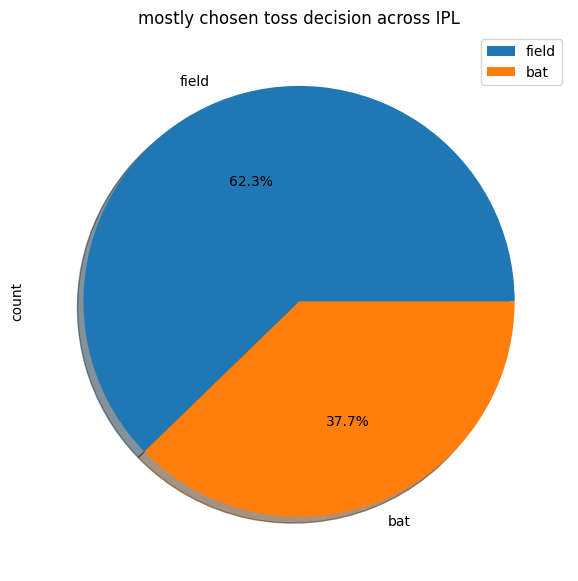

In [181]:
# Chart - 1 visualization code

plt.figure(figsize=(13,7))
match['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, shadow=True)
plt.title('mostly chosen toss decision across IPL')

##### 1. Why did you pick the specific chart?


A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know the 62.3% time teams choose to fielding first & 37.7% choose to bat first.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Various teams can take a informed decision based on this chart in next seasons.

#### Chart - 2 - How many times different team win toss across all seasons.


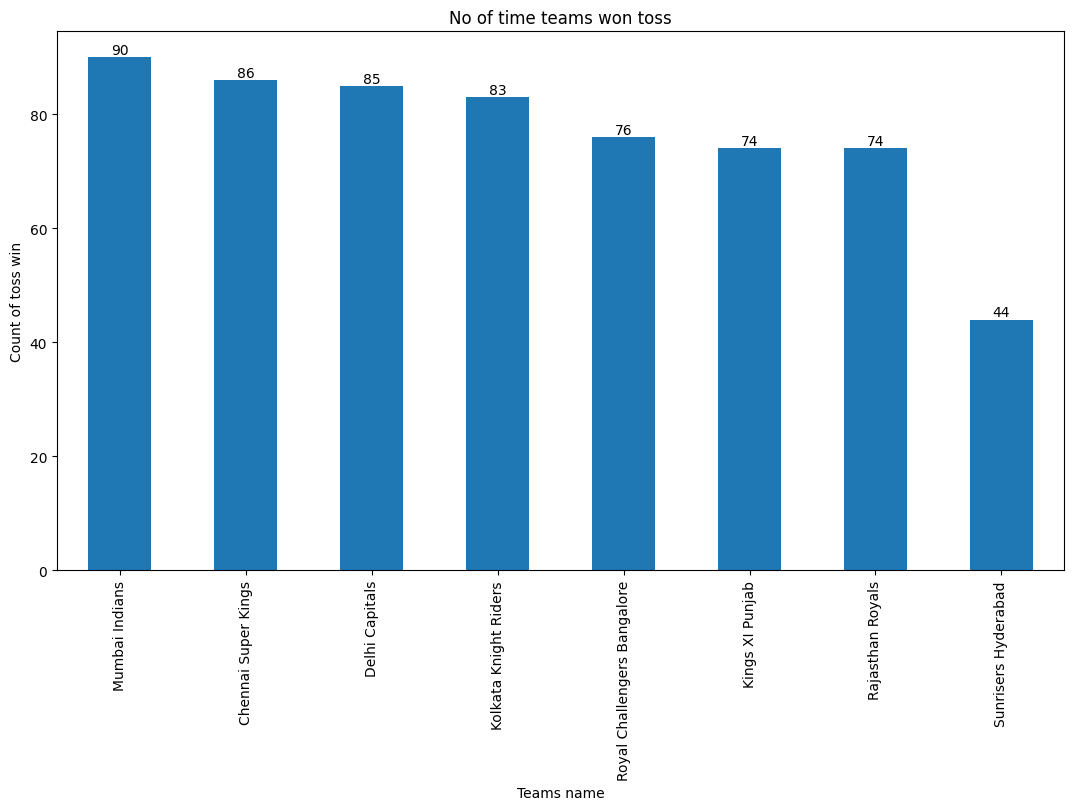

In [182]:
# Chart - 2 visualization code

plt.figure(figsize=(13,7))
a = match['toss_winner'].value_counts().plot(kind='bar')
plt.title("No of time teams won toss")
plt.xlabel("Teams name")
plt.ylabel("Count of toss win")

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know the Mumbai indians win 90 toss across all seasons. This also showa that probability of wining the toss is equal because almost all teams have won toss in similar range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Teams can analyze that is there any effect of wining or loosing the match if a team win or loos  the toss.

#### Chart - 3 - wining % of a match if team won the toss.

In [183]:
(match['winner'] == match['toss_winner']).value_counts()

True     324
False    288
Name: count, dtype: int64

Text(0.5, 1.0, 'Wining % of a match if team won the toss.')

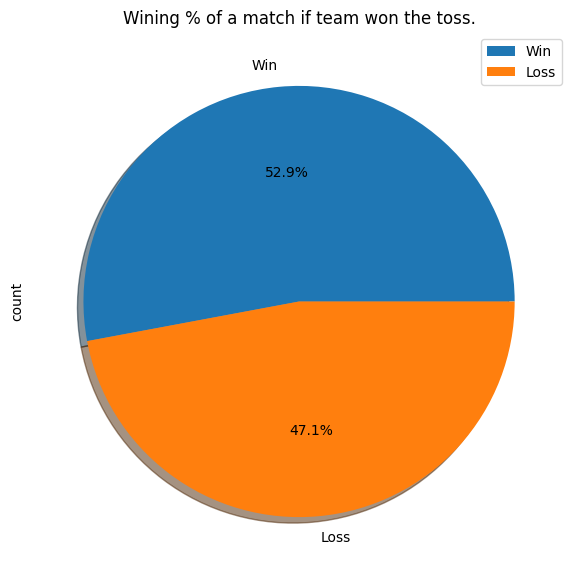

In [184]:
# Chart - 3 visualization code

plt.figure(figsize=(13,7))
(match['winner'] == match['toss_winner']).value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Win', 'Loss'], legend=True, shadow=True)
plt.title("Wining % of a match if team won the toss.")


##### 1. Why did you pick the specific chart?


A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know the 52.9% time teams win match if they won the toss.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Various teams can take a informed decision based on this chart in next seasons.

#### Chart - 4 - Bating vs Fielding decision effect on match decision

In [185]:
# data extraction

print('field\n',((match['winner'] == match['toss_winner']) & (match['toss_decision'] == 'field')).value_counts())
print('bat\n',((match['winner'] == match['toss_winner']) & (match['toss_decision'] == 'bat')).value_counts())

field
 False    395
True     217
Name: count, dtype: int64
bat
 False    505
True     107
Name: count, dtype: int64


Text(0.5, 0.98, 'Bating vs Fielding decision effect on match decision')

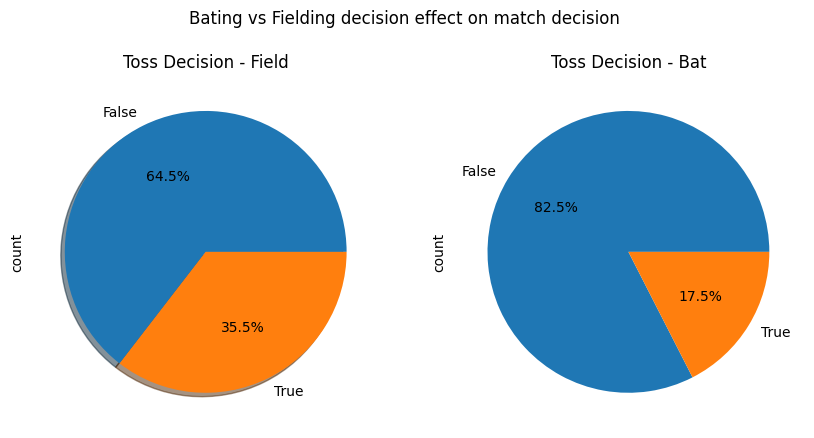

In [186]:
# Chart - 4 visualization code

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Toss Decision - Field')
((match['winner'] == match['toss_winner']) & (match['toss_decision'] == 'field')).value_counts().plot(kind='pie', ax=axs[0], autopct='%1.1f%%', shadow=True)

axs[1].set_title('Toss Decision - Bat')
((match['winner'] == match['toss_winner']) & (match['toss_decision'] == 'bat')).value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%')

fig.suptitle("Bating vs Fielding decision effect on match decision")


##### 1. Why did you pick the specific chart?


A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that if a team choose to field first then there winning chance are more than bat first.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Various teams can take a informed decision based on this chart in next seasons.

#### Chart - 5 - No of times different teams won match when they won the toss.

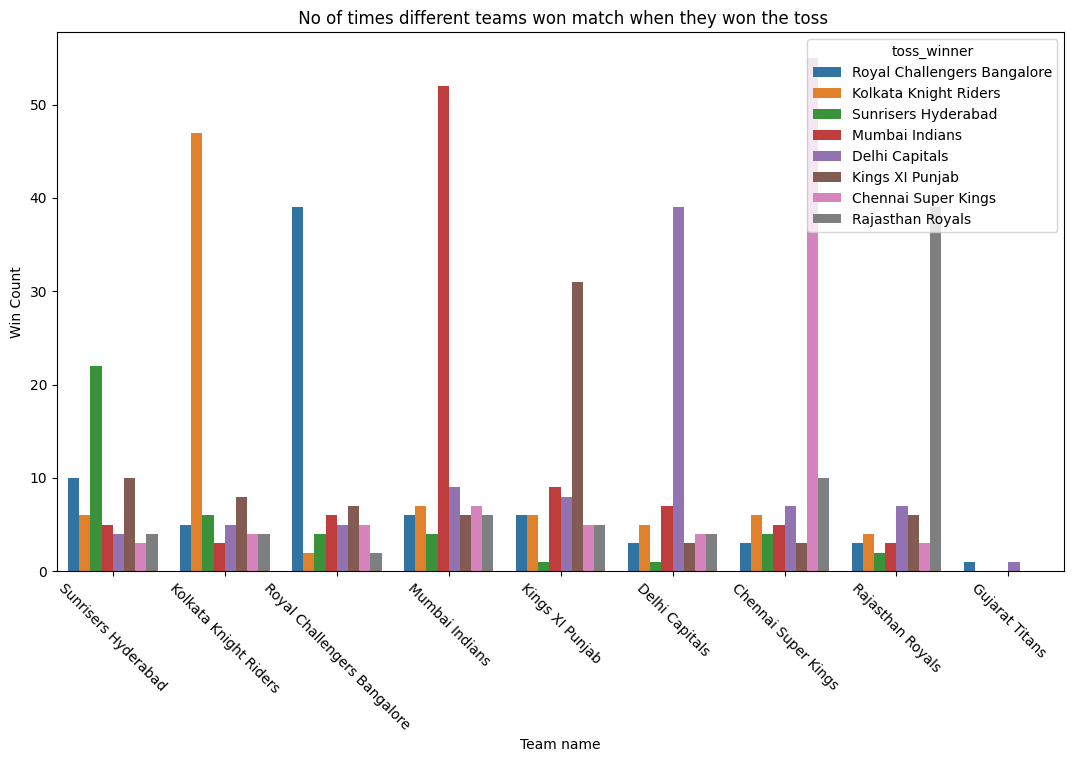

In [187]:
# Chart - 5 visualization code

plt.figure(figsize=(13,7))
sns.countplot(data=match, x='winner', hue='toss_winner')
plt.xticks(rotation=-45)
plt.title(" No of times different teams won match when they won the toss")
plt.xlabel("Team name")
plt.ylabel("Win Count")
plt.show()

##### 1. Why did you pick the specific chart?

Side by Side Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that for most of the teams chance of wining the match is high when they won the toss.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Teams can make strategy based on this conditions and increase there chance of winning and loosing against opponent teams.

#### Chart - 6 - Maximum score in different seasons of IPL.

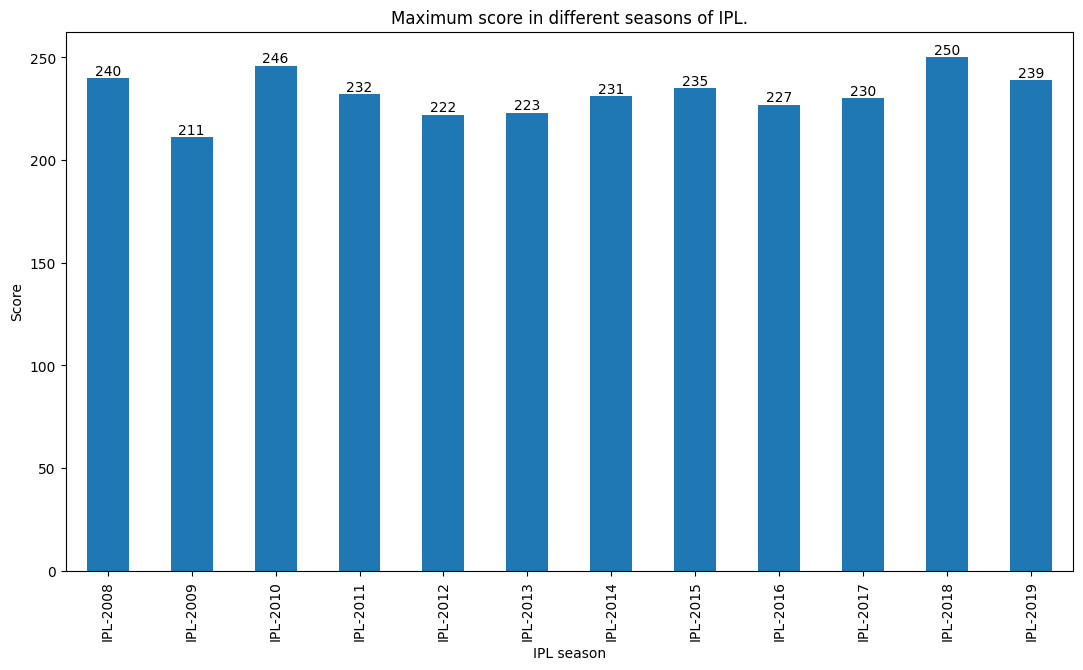

In [188]:
# Chart - 6 visualization code

plt.figure(figsize=(13,7))
a = match.groupby('Season')['total_runs'].max().plot(kind='bar')
plt.title("Maximum score in different seasons of IPL.")
plt.xlabel("IPL season")
plt.ylabel("Score")

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know the Range of highest score range of 20-20 cricket format across various seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Teams get to know that what is the score range in which hard to win a match so teams can try to keep score below it to increase there chance of wining.

#### Chart - 7 - How many times different teams won matches.

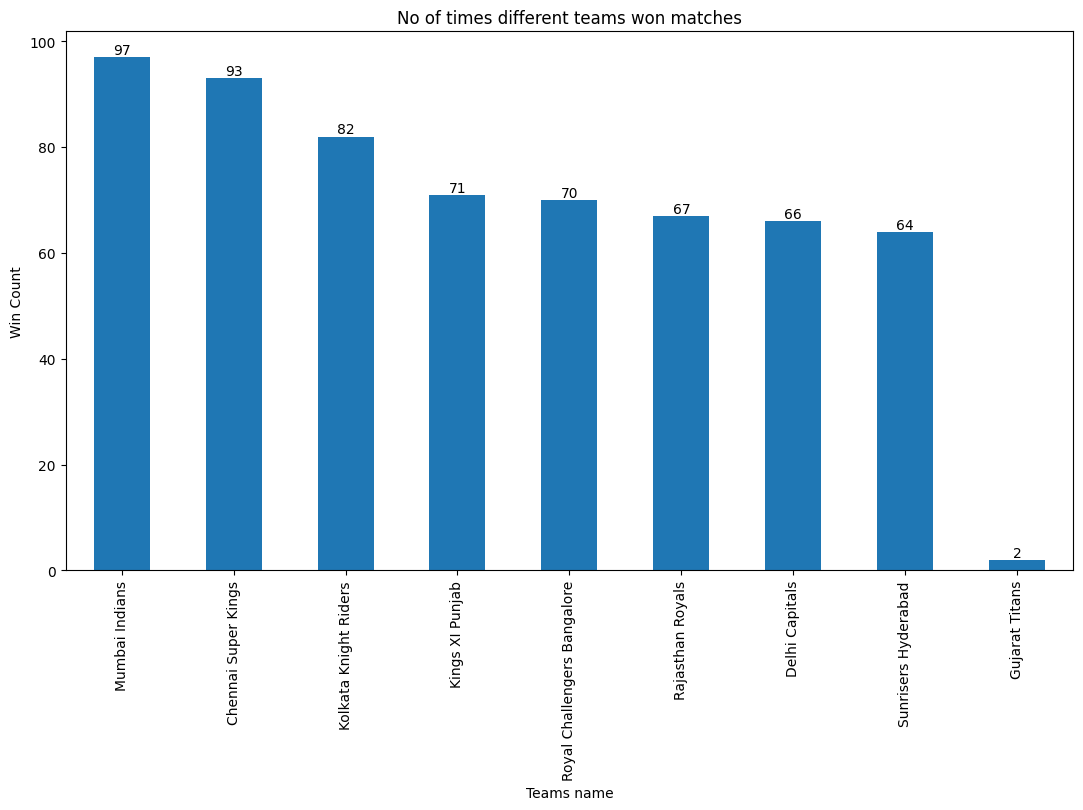

In [189]:
# Chart - 7 visualization code

plt.figure(figsize=(13,7))
a = match['winner'].value_counts().plot(kind='bar')
plt.title("No of times different teams won matches")
plt.xlabel("Teams name")
plt.ylabel("Win Count")

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that 'mumbai indians' & 'chennai super kings' is most consistent team who win maximum amount of matches.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. based on this char business can decide the add value of different teams. & teams can create decisions based on this chat that which team is hard to defeat so players can prepare accordingly.

#### Chart - 8 - top 10 players who became man of the match.

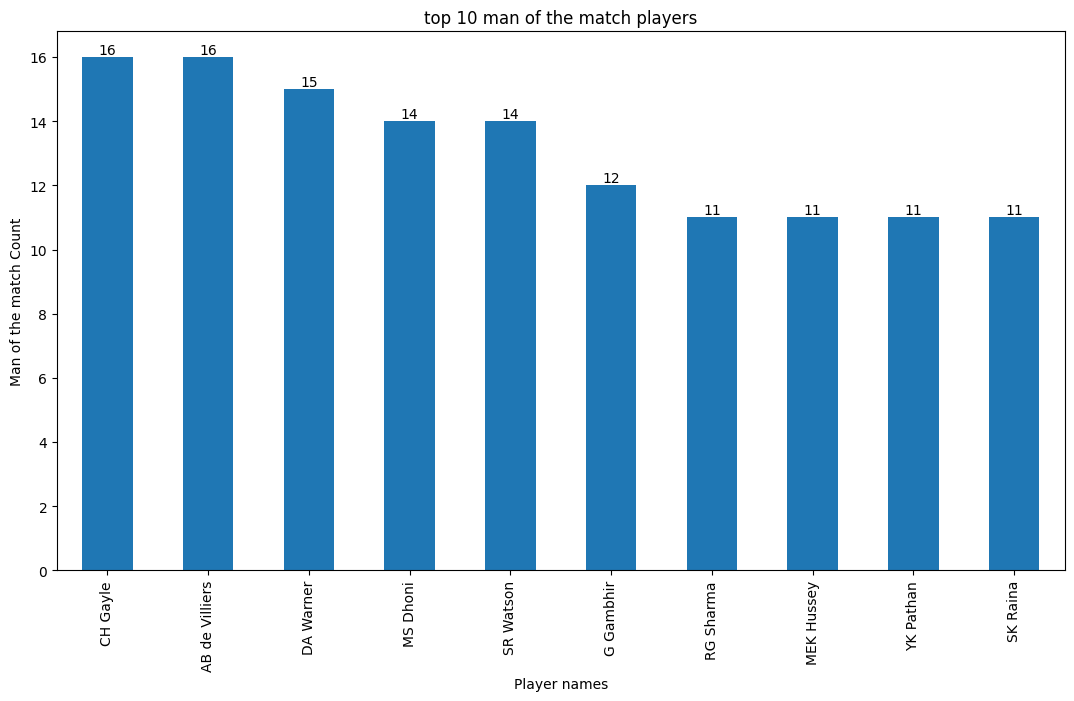

In [190]:
# Chart - 8 visualization code

plt.figure(figsize=(13,7))
a = match['player_of_match'].value_counts().nlargest(10).plot(kind='bar')
plt.title("top 10 man of the match players")
plt.xlabel("Player names")
plt.ylabel("Man of the match Count")

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that 'chris gayle' & 'AB de villiers' got man of the match 16 time and 'warner' & 'MS. Dhoni' got 15 & 14 time man of the match title.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. teams get to most consistent players in this chart and business get to know most valuable players based on add revenues.

#### Chart - 9 - Top 10 bowlers who take most of the wickets.

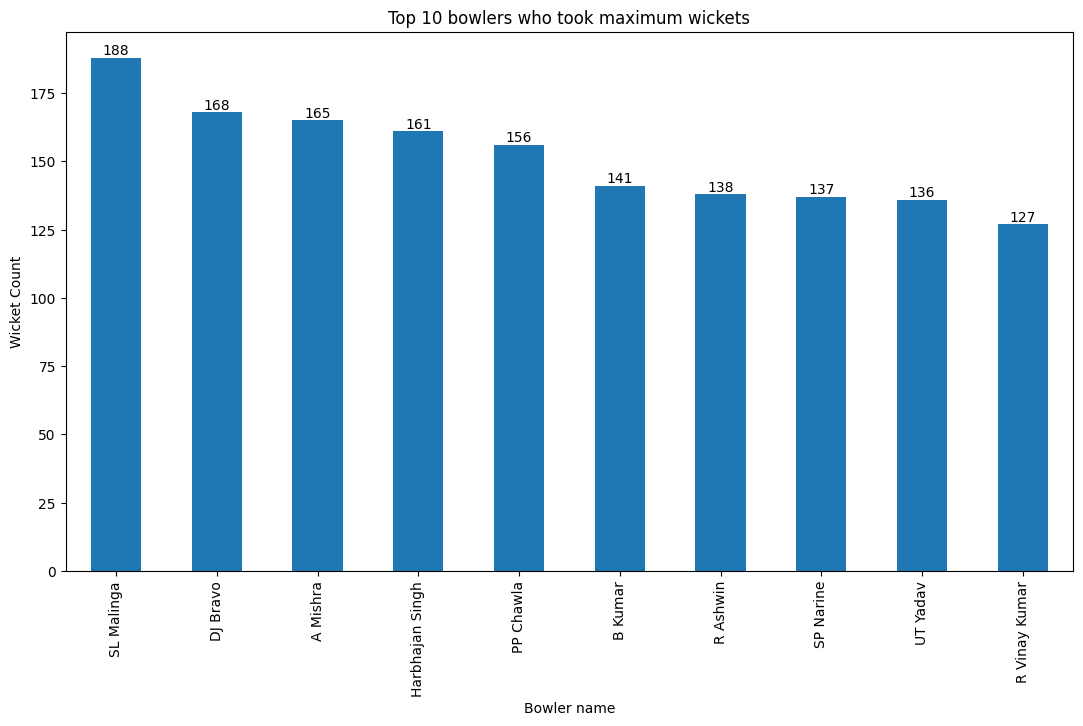

In [191]:
# Chart - 9 visualization code

plt.figure(figsize=(13,7))
a = delivery.groupby('bowler')['player_dismissed'].count().nlargest(10).plot(kind='bar')
plt.title("Top 10 bowlers who took maximum wickets")
plt.xlabel("Bowler name")
plt.ylabel("Wicket Count")

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that 'Malinga' took 188 wickets which is maximum of all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. teams get to know which bowler is took most of the wickets so they prepare for them if they compete against them. and business get to know most valuable bowler.

#### Chart - 10 - Most popular city to organize a match.

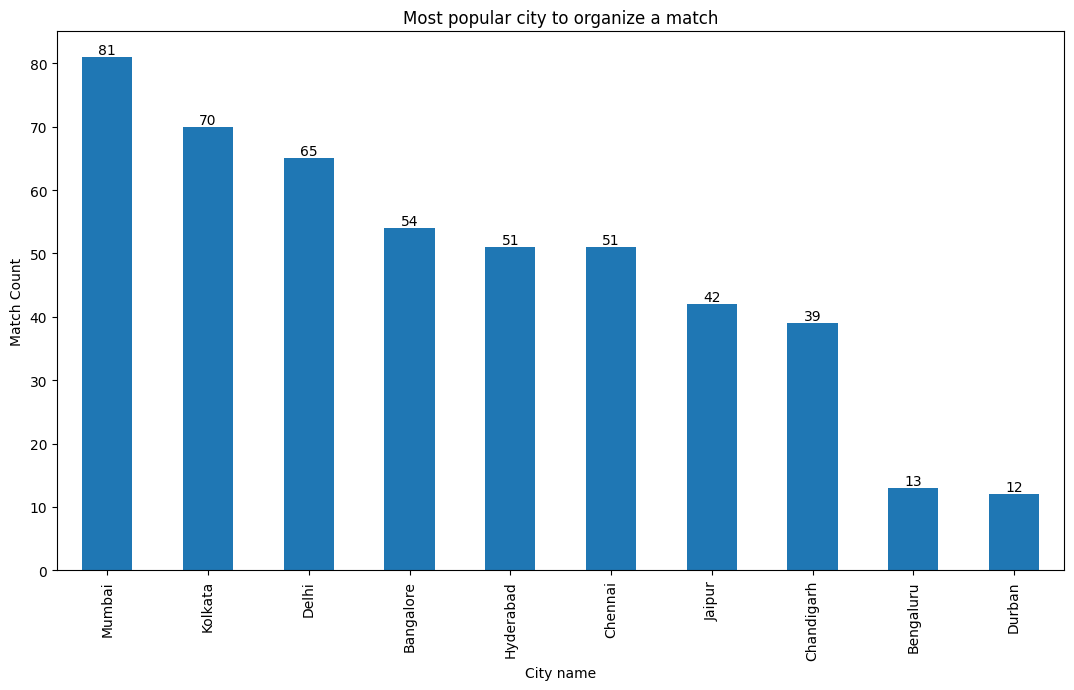

In [192]:
# Chart - 10 visualization code

plt.figure(figsize=(13,7))
a = match['city'].value_counts().head(10).plot(kind='bar')
plt.title("Most popular city to organize a match")
plt.xlabel("City name")
plt.ylabel("Match Count")

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that 'Mumbai' & 'Kolkata' is most popular city to organize a match.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. business get to know that which city is  most popular for organize a match based on there requirements.

#### Chart - 11 - Most popular stadium to organize a match.

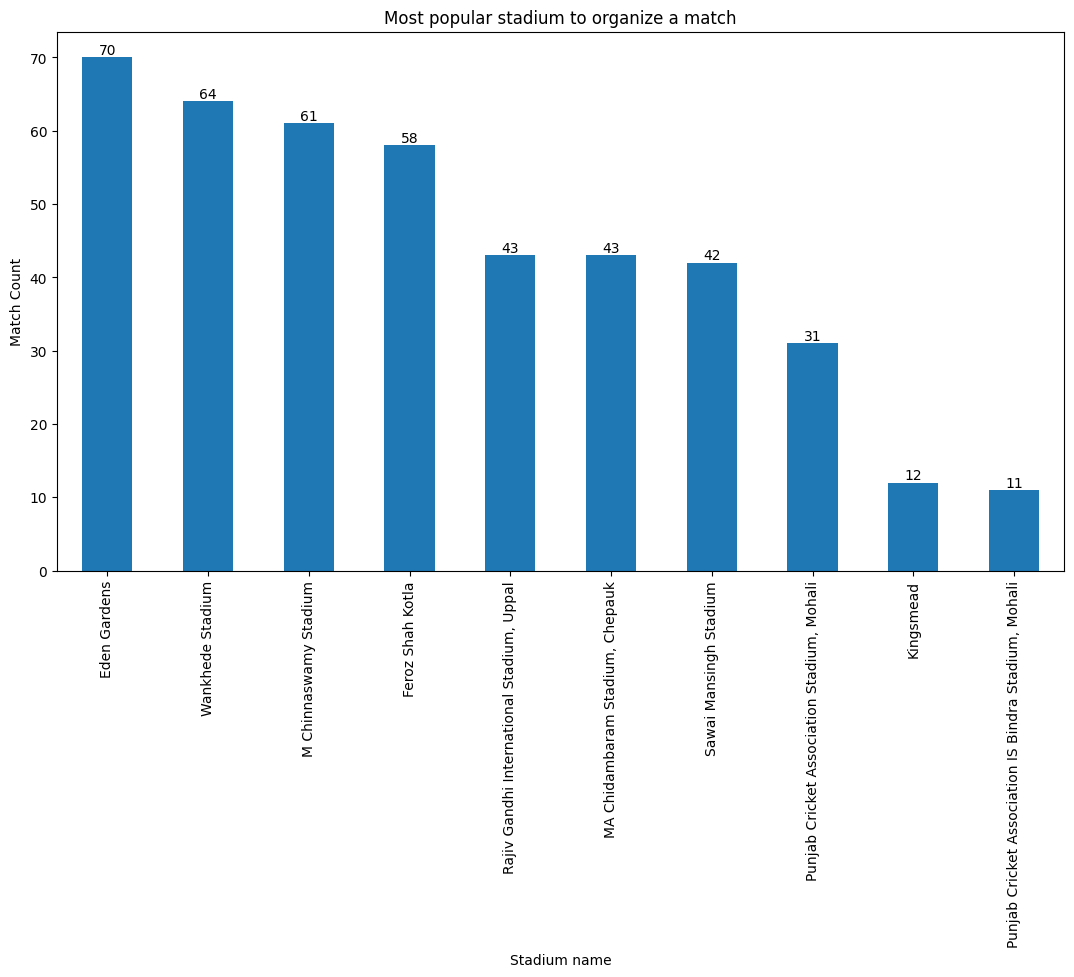

In [193]:
# Chart - 11 visualization code

plt.figure(figsize=(13,7))
a = match['venue'].value_counts().head(10).plot(kind='bar')
plt.title("Most popular stadium to organize a match")
plt.xlabel("Stadium name")
plt.ylabel("Match Count")

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?


From the above chart, we got to know that 'Eden gardens' is most popular stadium to organize a match.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. business get to know which stadium is best for there needs match based on there requirements.

#### Chart - 12 - Stadium has batting or bowling field.

In [194]:
# match_df['venue'].value_counts().head(20).index

ven = ['Eden Gardens', 'Wankhede Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla', 'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Sawai Mansingh Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Kingsmead',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Sardar Patel Stadium, Motera', 'Brabourne Stadium', 'SuperSport Park',
       'Maharashtra Cricket Association Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Rajiv Gandhi Intl. Cricket Stadium', 'M. A. Chidambaram Stadium',
       'Feroz Shah Kotla Ground', 'Dubai International Cricket Stadium',
       'Sheikh Zayed Stadium']

plot2 = match[match['venue'].isin(ven)]

<ipython-input-195-d84aa69d37ca>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=plot2, x='venue', hue='toss_decision', palette=sns.color_palette('bright'),order=plot2['venue'].value_counts().index)


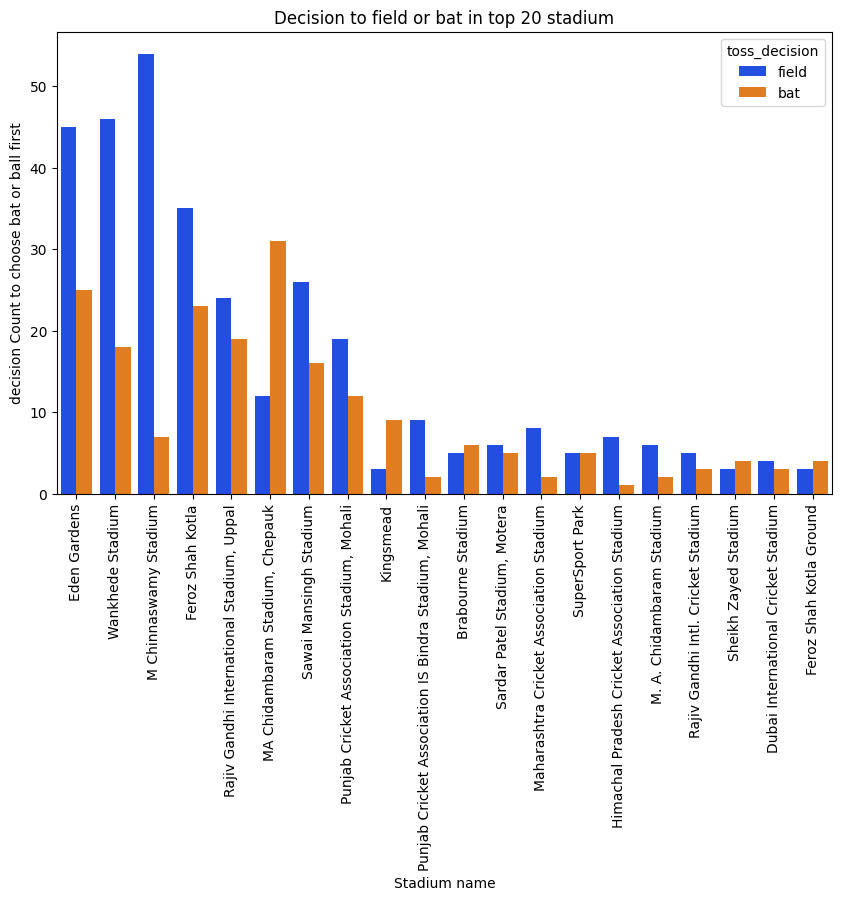

In [195]:
# Chart - 12 visualization code

plt.subplots(figsize=(10,6))
sns.countplot(data=plot2, x='venue', hue='toss_decision', palette=sns.color_palette('bright'),order=plot2['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Decision to field or bat in top 20 stadium")
plt.xlabel("Stadium name")
plt.ylabel("decision Count to choose bat or ball first")
plt.show()

##### 1. Why did you pick the specific chart?

Side by Side Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that which stadium has which kind of field so teams can choose bat or ball first according to that.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Teams get to know that in which ground they got benefit based on day conditions like humidity and temperature and take best decision to win the match.

#### Chart - 13 - Distribution of teams win by runs.

<function matplotlib.pyplot.show(close=None, block=None)>

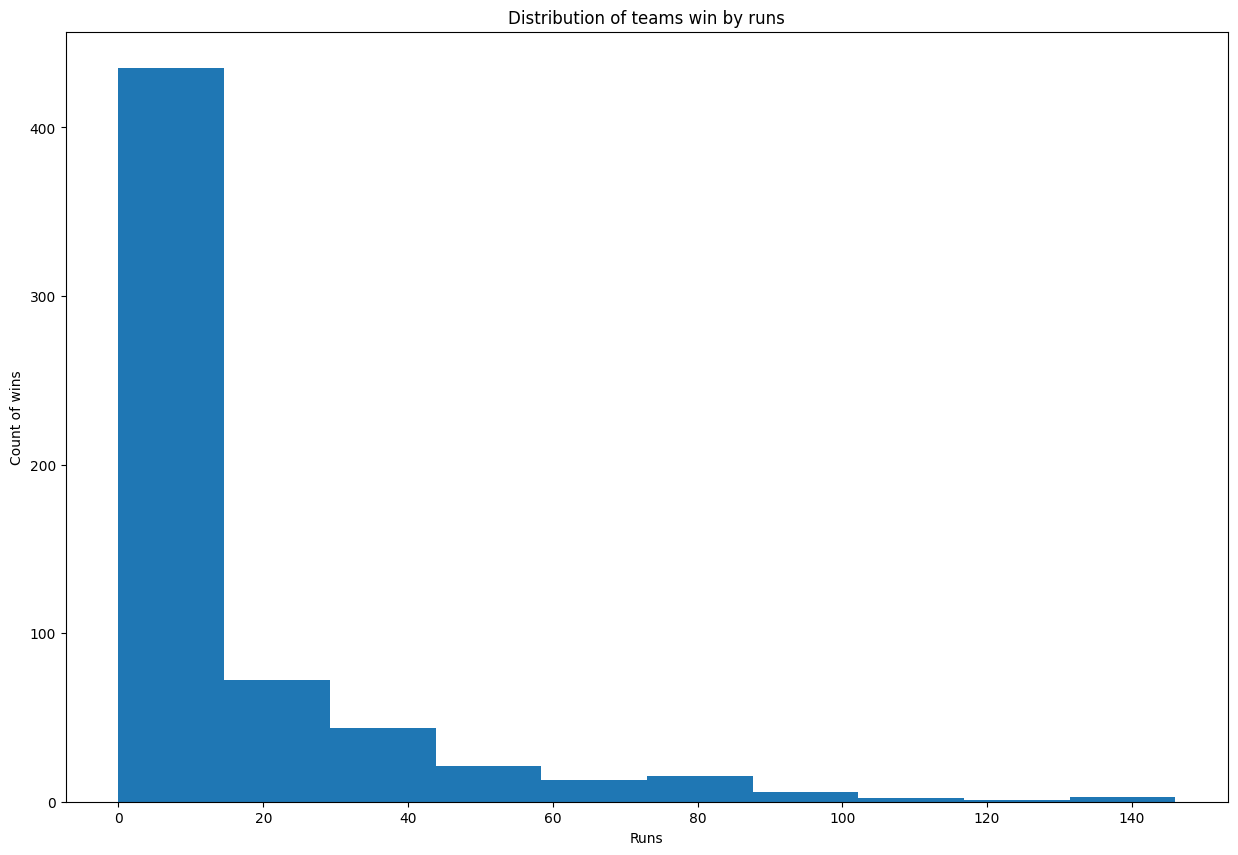

In [196]:
# Chart - 13 visualization code

plt.figure(figsize=(15,10))
plt.hist(match["win_by_runs"])
plt.title("Distribution of teams win by runs")
plt.xlabel("Runs")
plt.ylabel("Count of wins")
plt.show

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that most of the teams win less then 25 runs in different matches.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. teams can make informed decisions based on this chart for there future matches.

#### Chart - 14 - Distribution of teams win by wickets.

In [197]:
# remove teams which got all out

plot1 = match[match["win_by_wickets"] != 0]

<function matplotlib.pyplot.show(close=None, block=None)>

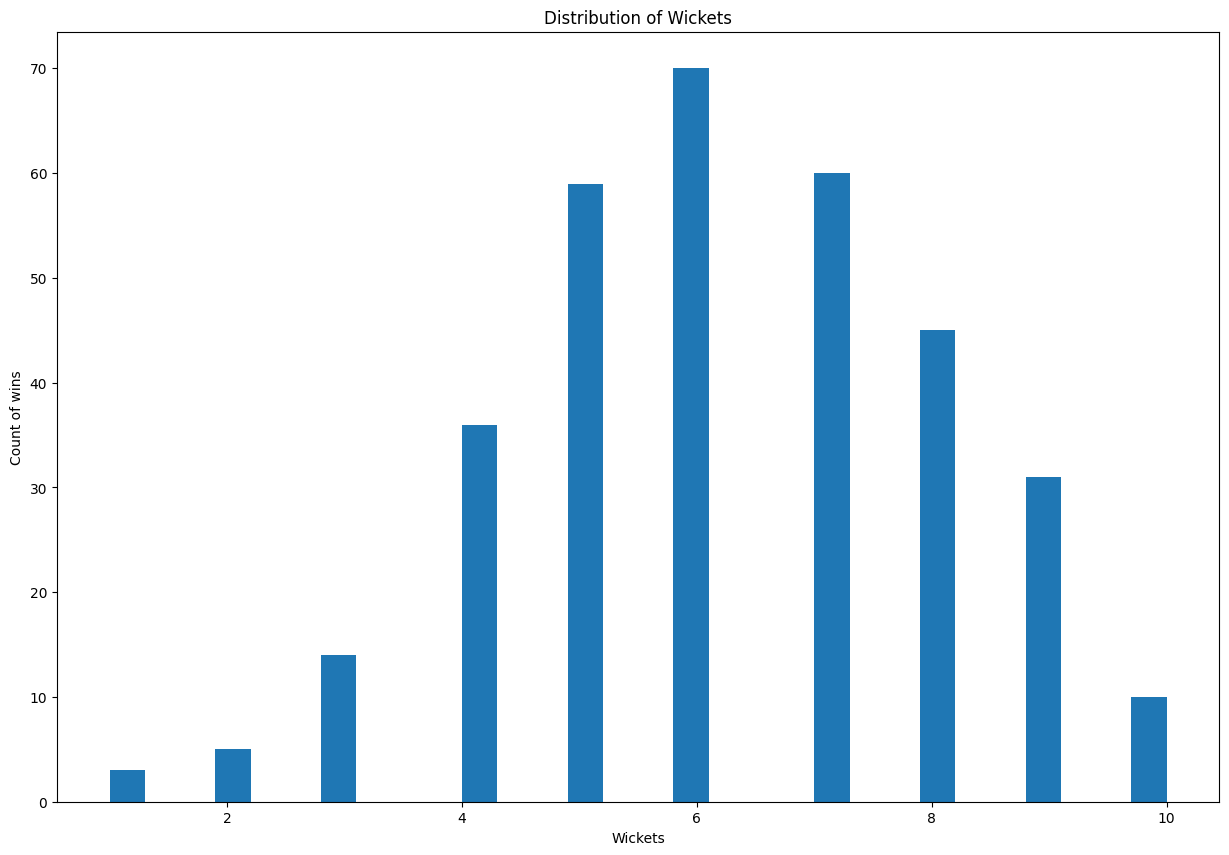

In [198]:
# Chart - 14 visualization code

plt.figure(figsize=(15,10))
plt.hist(plot1["win_by_wickets"],bins=30)
plt.title("Distribution of Wickets")
plt.xlabel("Wickets")
plt.ylabel("Count of wins")
plt.show

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that teams win by wicket follow normal distribution that maximum teams win by 6 wickets. probability of wining more or less then 6 wickets is decreasing continuously.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. teams can make informed decisions based on this chart for there future matches.

#### Chart - 15 - Correlation Heatmap

In [199]:
# Preparing data for heatmap
match['city'] = match['city'].replace('Bengaluru','Bangalore')
match['count'] = 1
data = match.groupby('city')[['city','count']].sum(numeric_only=True).sort_values(by='count',ascending=False).reset_index()[:10]
data = data['city']


df_heatmap = match[match['city'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['city'],df_heatmap['winner'],normalize = "index").T
df_heatmap

city,Bangalore,Chandigarh,Chennai,Delhi,Durban,Hyderabad,Jaipur,Kolkata,Mumbai,Pune
winner,,,,,,,,,,
Chennai Super Kings,0.074627,0.076923,0.725490,0.092308,0.083333,0.039216,0.071429,0.071429,0.123457,0.454545
Delhi Capitals,0.059701,0.025641,0.039216,0.430769,0.166667,0.058824,0.047619,0.028571,0.037037,0.090909
Gujarat Titans,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kings XI Punjab,0.074627,0.461538,0.039216,0.076923,0.166667,0.058824,0.023810,0.042857,0.061728,0.000000
Kolkata Knight Riders,0.119403,0.076923,0.039216,0.076923,0.166667,0.078431,0.071429,0.600000,0.012346,0.181818
Mumbai Indians,0.134328,0.102564,0.098039,0.061538,0.000000,0.078431,0.047619,0.142857,0.604938,0.090909
Rajasthan Royals,0.059701,0.076923,0.019608,0.061538,0.166667,0.039216,0.642857,0.028571,0.086420,0.090909
Royal Challengers Bangalore,0.447761,0.076923,0.039216,0.092308,0.250000,0.019608,0.071429,0.057143,0.049383,0.090909
Sunrisers Hyderabad,0.029851,0.102564,0.000000,0.092308,0.000000,0.627451,0.023810,0.028571,0.024691,0.000000


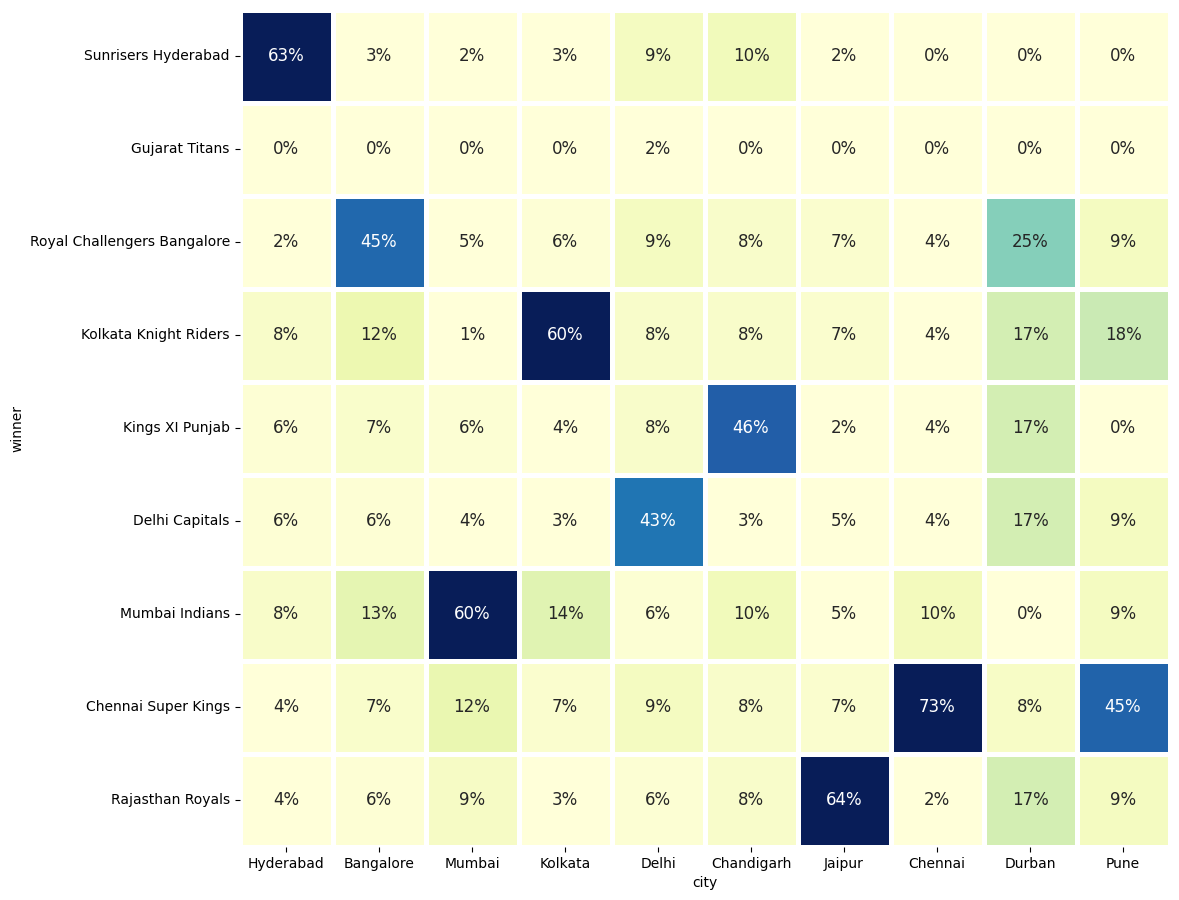

In [200]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

city_order = ['Hyderabad', 'Bangalore', 'Mumbai', 'Kolkata',
       'Delhi', 'Chandigarh', 'Jaipur', 'Chennai', 'Durban', 'Pune']

team_order = ['Sunrisers Hyderabad', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Capitals', 'Mumbai Indians',
       'Chennai Super Kings', 'Rajasthan Royals']

sns.heatmap(data=df_heatmap.loc[team_order, city_order],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, (city and winner teams). It allows for a clear representation of patterns, trends, and comparisons across different categories

##### 2. What is/are the insight(s) found from the chart?

1. We found that every team in to there home city or state perform excepyionally well.

#### Chart - 14 - Pair Plot

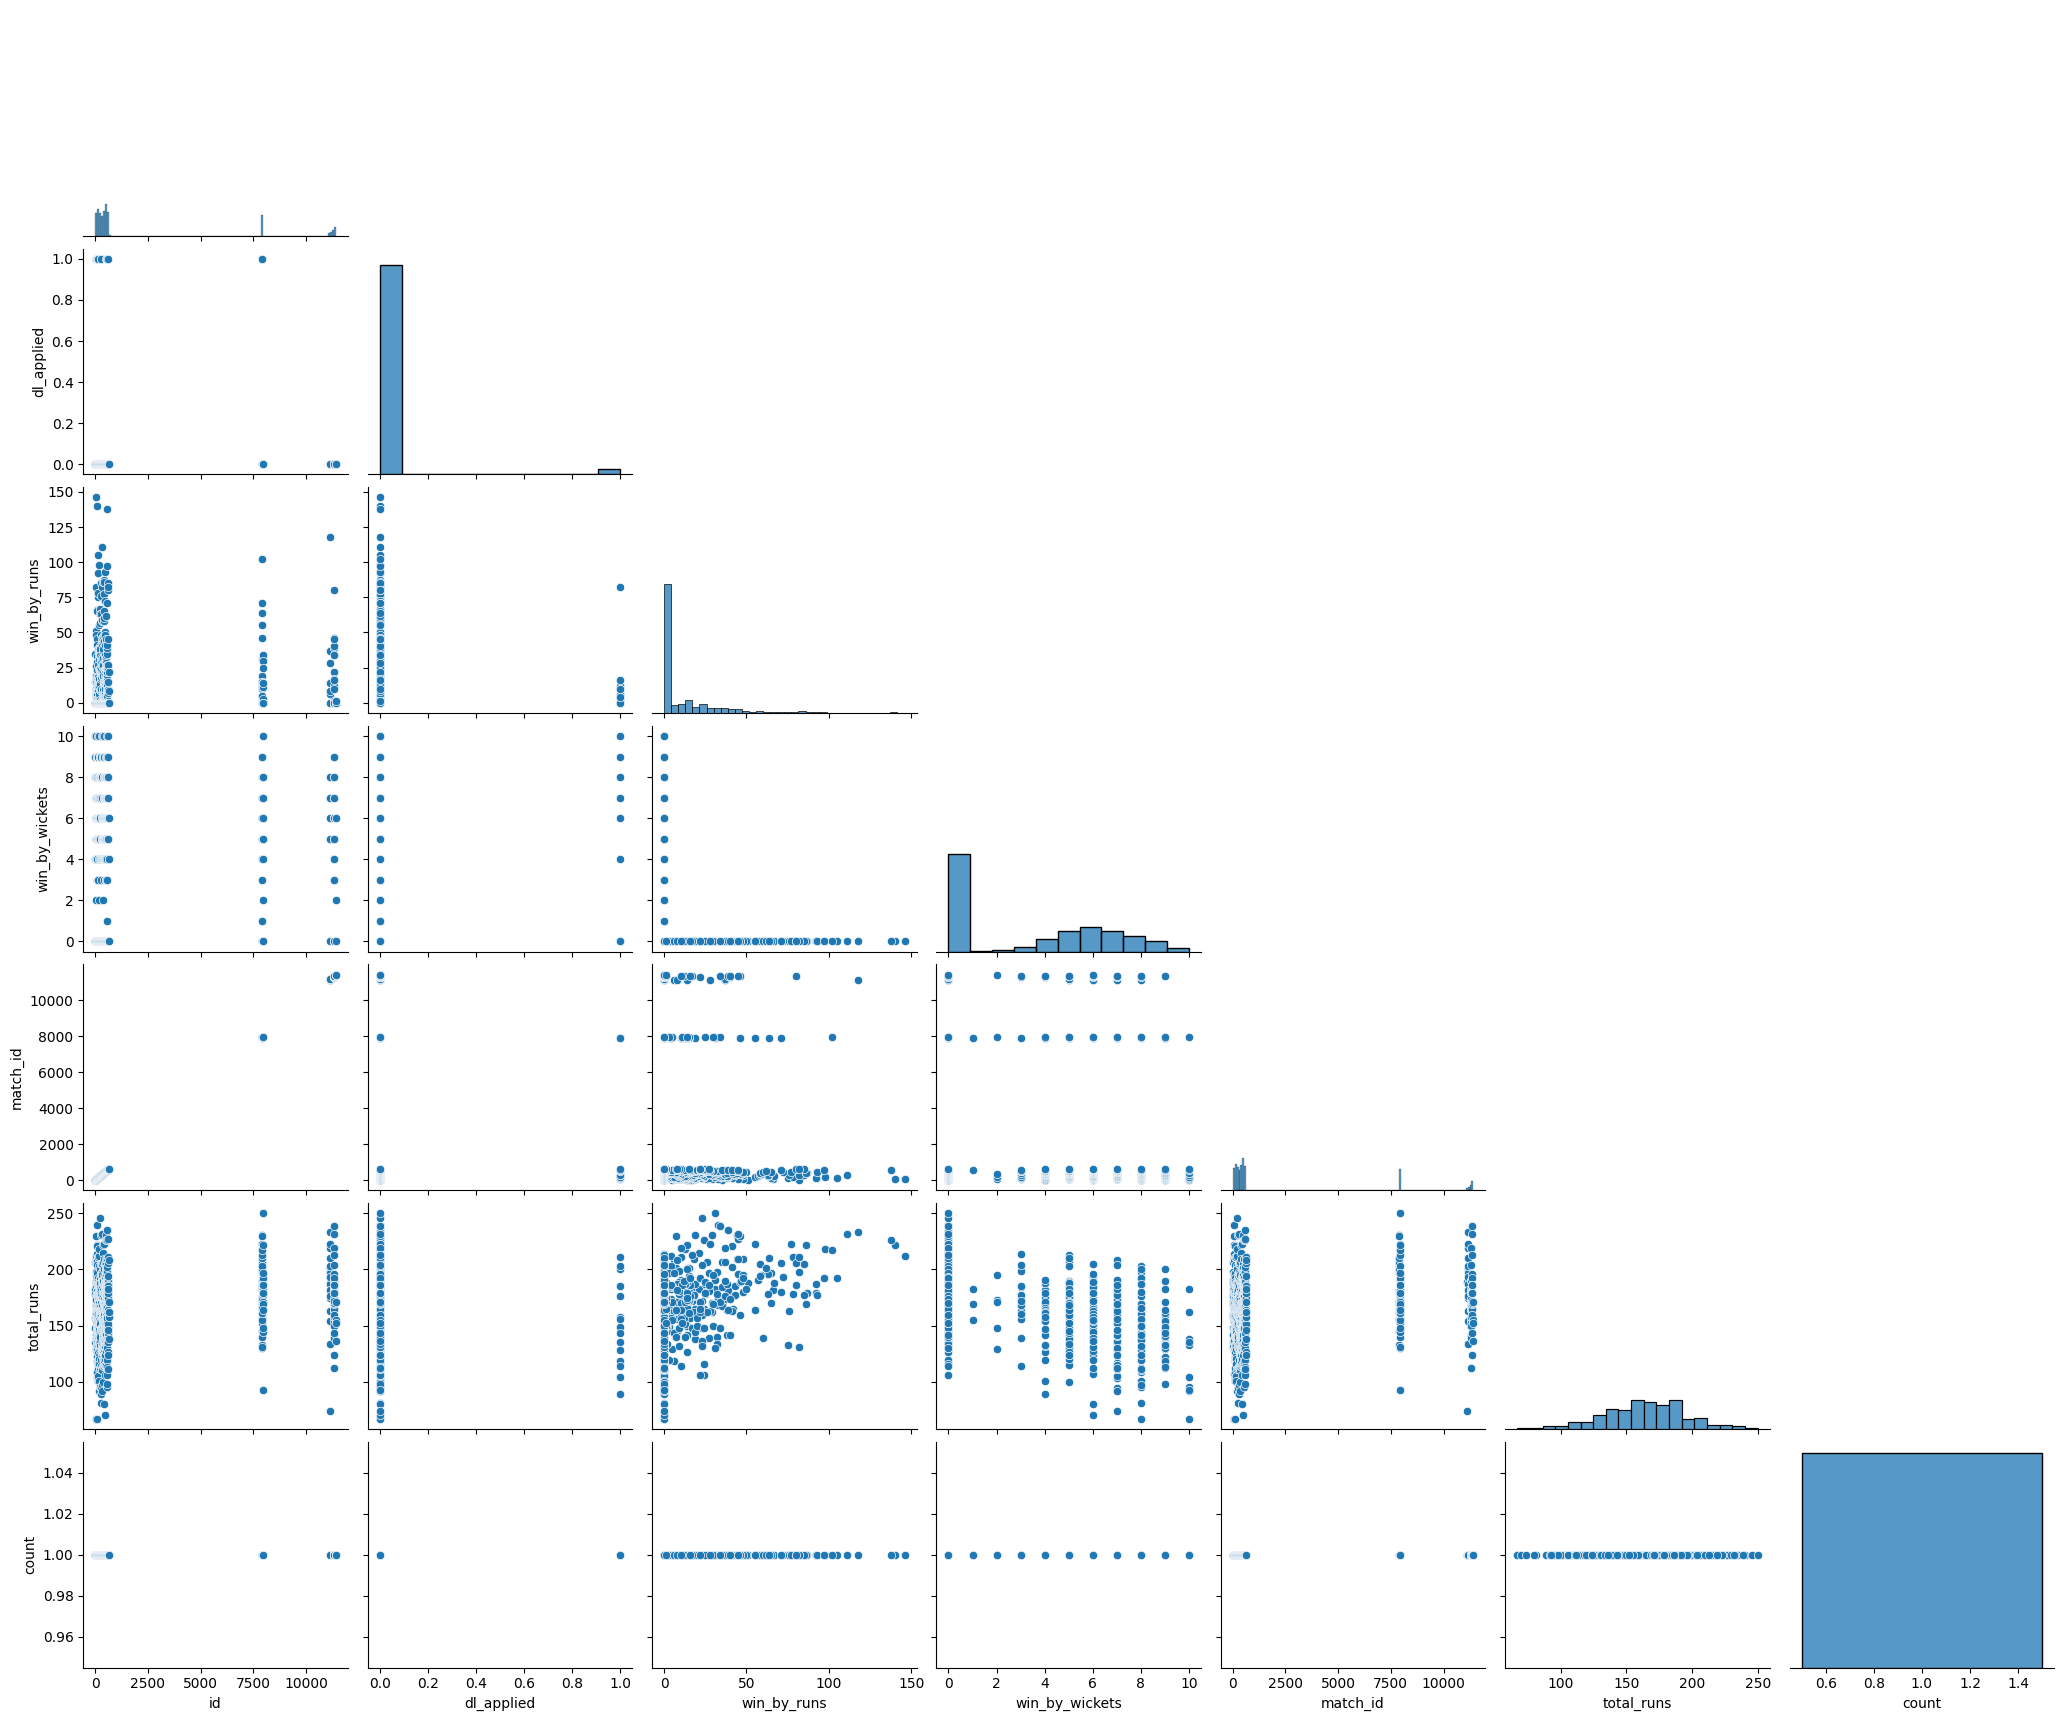

In [201]:
# Pair Plot visualization code

sns.pairplot(match, corner = True, aspect = 1.2)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is a suitable choice when visualizing the relationships between different categorical variables. It allows for a clear representation of patterns, trends, and comparisons across different categories

##### 2. What is/are the insight(s) found from the chart?

There is no direct relation found in pair plot between different columns

## ***5. Feature Engineering & Data Pre-processing***

###  Data Transformation

In [202]:
# make a copy of data for pre process for ML operations

delivery_df = df1
match_df = df2

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [203]:
# create  new column called total score

total_score = delivery_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
total_score = total_score[total_score['inning']==1]
total_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [204]:
# add total score column in match data frame

match_df = match_df.merge(total_score[['match_id', 'total_runs']], left_on='id', right_on='match_id')
match_df.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,207


In [205]:
# check different teams for further analysis

match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [206]:
# extracting current playing teams and removing teams which now not participate

teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans'
]

In [207]:
# change teams old name to new names

match_df['team1'] = match_df['team1'].replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].replace('Gujarat Lions','Gujarat Titans')
match_df['team2'] = match_df['team2'].replace('Gujarat Lions','Gujarat Titans')

In [208]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [209]:
match_df.shape

(667, 19)

In [210]:
# Removing matches which got effected by rain

match_df = match_df[match_df['dl_applied']==0]
match_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,207
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,3,183


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

yes i have add few important columns remove unwanted columns and filter required information from required columns.

####  Feature Selection

In [211]:
# taking required columns from match_df for ML operations

match_df = match_df[['match_id','city','winner','total_runs']]

In [212]:
# merge match df to delivery df for  ML operations

delivery_df = match_df.merge(delivery,on='match_id')
delivery_df.shape

(155701, 24)

In [213]:
# extract 2 inning data from data frame

delivery_df = delivery_df[delivery_df['inning']==2]
delivery_df.shape

(75332, 24)

In [214]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155696,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
155697,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
155698,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
155699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [215]:
# create new column called current score

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [216]:
# create new column called runs left

delivery_df['runs_left'] = (delivery_df['total_runs_x'] + 1) - delivery_df['current_score']
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207


In [217]:
# create new column called balls left

delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118


In [218]:
# create new column showing wickets left of batting team

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == '0' else '1')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)
wickets = delivery_df.groupby('match_id').cumsum(numeric_only=True)['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [219]:
# create new column showing current run rate

delivery_df['crr'] = (delivery_df['current_score']*6 )/ (120 - delivery_df['balls_left'])

In [220]:
# create new column showing required run rate

delivery_df['rrr'] = (delivery_df['runs_left']*6 )/ delivery_df['balls_left']

In [221]:
# define function to classify if 2 inning team is winner or not

def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [222]:
# create new column based on the function

delivery_df['result'] = delivery_df.apply(result,axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


####  Feature Selection

In [223]:
# extracting required features from delivery df

df = delivery_df[['batting_team','bowling_team','city','current_score','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [224]:
df = df.sample(df.shape[0])
df

,batting_team,bowling_team,city,current_score,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
29070,Deccan Chargers,Chennai Super Kings,East London,83,96,55,4,178,7.661538,10.472727,0
78233,Rajasthan Royals,Kings XI Punjab,Jaipur,73,52,56,7,124,6.843750,5.571429,1
109331,Kings XI Punjab,Chennai Super Kings,Chennai,8,185,111,9,192,5.333333,10.000000,0
148883,Mumbai Indians,Royal Challengers Bangalore,Mumbai,128,52,31,7,179,8.629213,10.064516,1
99473,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,80,63,49,8,142,6.760563,7.714286,1
...,...,...,...,...,...,...,...,...,...,...,...
7905,Gujarat Lions,Kings XI Punjab,Chandigarh,120,70,53,9,189,10.746269,7.924528,1
95805,Royal Challengers Bangalore,Mumbai Indians,Mumbai,110,78,53,8,187,9.850746,8.830189,0
73610,Delhi Daredevils,Kings XI Punjab,Dharamsala,117,25,37,8,141,8.457831,4.054054,1
75725,Delhi Daredevils,Rajasthan Royals,Delhi,9,157,110,10,165,5.400000,8.563636,0


##### What all feature selection have you done and why?

I created various columns required for my ML model
1. create total score column in match df.
2. removing teams which not playing now & update teams old name to new names.
3. Remove matches which got affected by rain.
4. Take required columns from match df and merge them in delivery df.
5. create current score column.
6. create new column called runs left.
7. create new column called balls left.
8. create new column called wickets show wickets left in batting team.
9. create new column called runs left.
10. create new column showing current run rate.
11. create new column showing required run rate.
12. Extract required columns from delivery df to perform ML operations.

##### Which all features you found important and why?

I found 'batting_team','bowling_team','city','current_score','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result' most important because these are the most important features to predict result of a match.

### . Handling Missing Values

In [225]:
df.isna().sum()

batting_team       0
bowling_team       0
city             832
current_score      0
runs_left          0
balls_left         0
wickets            0
total_runs_x       0
crr                0
rrr                5
result             0
dtype: int64

In [226]:
df = df.dropna()

In [227]:
df = df[df['balls_left'] != 0]

#### What all missing value imputation techniques have you used and why did you use those techniques?

I drop all columns in final data frame which have null values in it.


###  Data Splitting

In [228]:
X = df.iloc[:,:-1]
y = df['result']

In [229]:
# split data for train and test

# from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [230]:
X_train.head()

,batting_team,bowling_team,city,current_score,runs_left,balls_left,wickets,total_runs_x,crr,rrr
126124,Gujarat Lions,Mumbai Indians,Kanpur,104,69,59,8,172,10.229508,7.016949
17603,Deccan Chargers,Kolkata Knight Riders,Hyderabad,127,78,26,4,204,8.106383,18.000000
27543,Kolkata Knight Riders,Mumbai Indians,East London,9,140,102,8,148,3.000000,8.235294
106417,Rajasthan Royals,Sunrisers Hyderabad,Visakhapatnam,16,112,98,10,127,4.363636,6.857143
1317,Kings XI Punjab,Royal Challengers Bangalore,Indore,14,135,109,10,148,7.636364,7.431193


##### What data splitting ratio have you used and why?

I use 80% of data for training and 20% data  for testing purpose. because 80 % data is enough for training the model and 20% data is required for test the models performance.

## ***6. ML Model Implementation***

### encoding categorical data

In [231]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

trans = ColumnTransformer([
    ('step 1',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

### ML Model Without Scaling  

#### Logistic Regression Model

In [232]:

# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline


In [233]:
pipe1 = Pipeline(steps=[
    ('step1',trans),
    ('step2',LogisticRegression(solver='liblinear'))
])

pipe1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step 1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

####  Accuracy & Cross- Validation

In [234]:

# Make predictions on the test set

y_pred = pipe1.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.8077570533970776

In [235]:
pipe1.predict_proba(X_test)[4]

array([0.62685785, 0.37314215])

This Logistic Regression model show 80.84% accuracy

#### RandomForest Classifier Model

In [236]:
pipe2 = Pipeline(steps=[
    ('step1',trans),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step 1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

####  Accuracy & Cross- Validation

In [237]:
# Make predictions on the test set

y_pred = pipe2.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.9985859538078243

In [238]:
pipe2.predict_proba(X_test)[4]

array([0.99, 0.01])

This RandomForest Classifier model show 99.85% accuracy

### ML Model With Scaling  :


In [239]:
# from sklearn.preprocessing import StandardScaler

In [240]:
trf = ColumnTransformer([
    ('step1', StandardScaler(), ['current_score', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']),
    ('step2',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

#### Logistic Regression Model

In [241]:
# Train a logistic regression scaled model

pipe_scal1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

pipe_scal1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

####  Accuracy & Cross- Validation

In [242]:
# Make predictions on the test set

y_pred = pipe_scal1.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.8076223823311561

In [243]:
pipe_scal1.predict_proba(X_test)[4]

array([0.62678804, 0.37321196])

This Logistic Regression model show 80.84% accuracy

#### RandomForest Classifier Model

In [244]:
# Train a logistic regression scaled model

pipe_scal2 = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

pipe_scal2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

####  Accuracy & Cross- Validation

In [245]:
# Make predictions on the test set

y_pred = pipe_scal2.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.9989899670055888

In [246]:
pipe_scal2.predict_proba(X_test)[4]

array([0.99, 0.01])

This RandomForest Classifier model show 99.87% accuracy

#### DecisionTree Classifier Model

In [247]:
# Train a logistic regression scaled model

pipe_scal3 = Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier())
])

pipe_scal3.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', DecisionTreeClassifier())])

####  Accuracy & Cross- Validation

In [248]:
# Make predictions on the test set

y_pred = pipe_scal3.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.9885529593966736

In [249]:
pipe_scal3.predict_proba(X_test)[4]

array([1., 0.])

This DecisionTree Classifier model show 98.80% accuracy

#### KNeighbors Classifier Model

In [250]:
# Train a logistic regression scaled model

pipe_scal4 = Pipeline(steps=[
    ('step1',trf),
    ('step2',KNeighborsClassifier())
])

pipe_scal4.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', KNeighborsClassifier())])

####  Accuracy & Cross- Validation

In [251]:
# Make predictions on the test set

y_pred = pipe_scal4.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.9935357888357687

In [252]:
pipe_scal4.predict_proba(X_test)[4]

array([1., 0.])

This KNeighbors Classifier model show 99.23% accuracy

#### Gradient Boosting Classifier Model

In [253]:
# Train a logistic regression scaled model

pipe_scal5 = Pipeline(steps=[
    ('step1',trf),
    ('step2',GradientBoostingClassifier())
])

pipe_scal5.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', GradientBoostingClassifier())])

####  Accuracy & Cross- Validation

In [254]:
# Make predictions on the test set

y_pred = pipe_scal5.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.8387987340919804

In [255]:
pipe_scal5.predict_proba(X_test)[4]

array([0.9655549, 0.0344451])

This Gradient Boosting Classifier model show 83.57% accuracy

#### SVC Model

In [256]:
# Train a logistic regression scaled model

pipe_scal6 = Pipeline(steps=[
    ('step1',trf),
    ('step2',SVC())
])

pipe_scal6.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', SVC())])

####  Accuracy & Cross- Validation

In [257]:
# Make predictions on the test set

y_pred = pipe_scal6.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.9645141741296882

This SVC model show 96.40% accuracy

### 1. ML model scores

without scaling
1. Logistic Regression model show 80.84% accuracy
2. RandomForest Classifier model show 99.85% accuracy

with scaling
1. Logistic Regression model show 80.84% accuracy
2. RandomForest Classifier model show 99.87% accuracy
3. DecisionTree Classifier model show 98.80% accuracy
4. KNeighbors Classifier model show 99.23% accuracy
5. Gradient Boosting Classifier model show 83.57% accuracy
6. SVC model show 96.40% accuracy

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

1. From the score we can see that Gradient boosting classifier model is best model for our data it show most balanced result without over fitting values. Here we get optimal number of score which is 83.57% accuracy, which is best without over fitting the model.

2. Within the Logistic regression also show similar score of 80.84% accuracy which is also best without over fitting.

3. Within the random forest classifier it show 99.87% accuracy which is highest but with this much high accuracy there is a lot of chance of over fitting the model.

4. The goal of this problems may be to predict the result of the match based on given conditions.

The primary function of this algorithm is to split data in training and testing models, then encoding categorical data, then scale data to train model, and predict the result of a given match condition and give probability of wining or loosing a match.

## ***7.*** ***Future Work ***

### 1. Save the l model in a pickle file or joblib file format for deployment process.


In [258]:
# Save the File

# import pickle


pickle.dump(pipe1,open('pipe1.pkl','wb'))            # save work in write binary mode
# pickle.dump(pipe2,open('pipe2.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [259]:
# Load the File and predict unseen data.

# Deserialize process (rb=read byte)
pickled_model= pickle.load(open('pipe1.pkl','rb'))

# Predicting the unseen data
pickled_model.predict(X_train)

array([1, 0, 0, ..., 1, 0, 1])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of the project was to apply various classification models to predict probability of the match result, with the ultimate goal of creating a classification model which best predict the result of a match based on given conditions. Some key points from the project include:

* Exploring the dataset consist of 756 records and 18 attributes in match data & 179078 records and 21 attributes in delivery data, with a focus on missing value imputation and exploratory data analysis (EDA).

* The analysis revealed Important decision about the match, most consistent batsman and bowler information, most popular city and stadium for match, and various important aspects of the match are revealed in EDA.

* To predict probability of the match, i have selected 11 key attributes: batting_team, bowling_team, city, current_score, runs_left, balls_left, wickets, total_runs_x, crr, rrr and result (these ate categorical and numerical columns). These attributes were divided into 80% of training and 20% testing data, and one hot encoding is apply on categorical data and standard scaler apply on numeric data.

* Next, i used 5 classification models Logistic Regression, RandomForest Classifier, DecisionTree Classifier, KNeighbors Classifier, Gradient Boosting Classifier, SVC. the accuracy result show that Gradient Boosting Classifier is the best model with balanced accuracy score of 83.57% followed by Logistic Regression model with accuracy score 80.84.

* In RandomForest Classifier model show 99.87% accuracy, which is highest in all models. but it may show over fitting in the results so I choose 'Gradient Boosting Classifier' and 'Logistic Regression' as best model with balanced accuracy score


The model give best probability of wining or loosing a match based on given conditions. model work with 80.83% of accuracy score which is good result for a classification model.

### ***Hurrah! You have successfully completed your Machine Learning assignment !!!***

In [260]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','current_score','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [261]:
temp_df,target = match_progression(delivery_df,5,pipe_scal5)
temp_df

Target- 157


,end_of_over,runs_after_over,wickets_in_over,lose,win
595,1,5,0,45.6,54.4
602,2,7,0,45.6,54.4
608,3,8,0,44.6,55.4
614,4,11,0,43.6,56.4
620,5,5,1,45.6,54.4
626,6,6,1,56.9,43.1
632,7,10,0,50.8,49.2
638,8,10,1,55.9,44.1
646,9,7,0,55.9,44.1
652,10,9,0,42.5,57.5


Text(0.5, 1.0, 'Target-157')

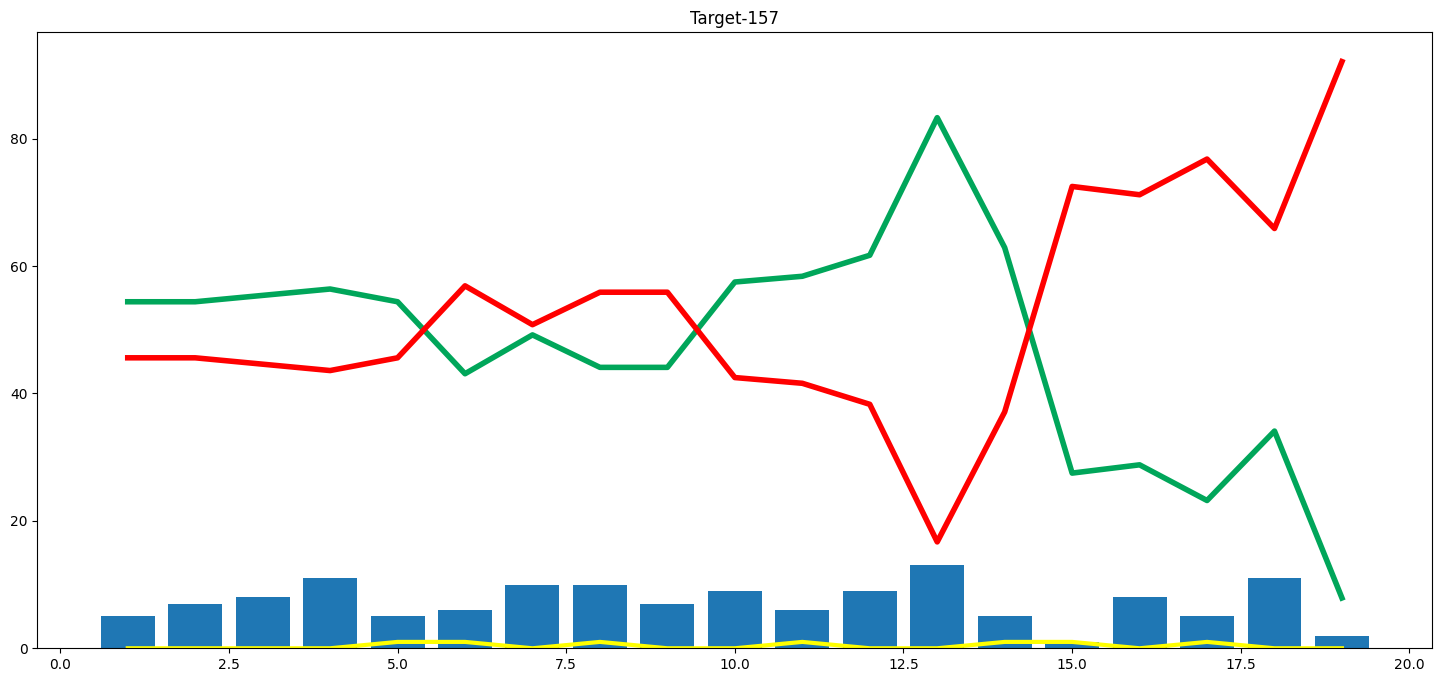

In [262]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))